In [28]:
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis

from scipy import stats
from sklearn.decomposition import PCA, FastICA

In [2]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [129]:
x = np.loadtxt('EleventhMixture100000Stats.txt')
x.shape

(4, 100000)

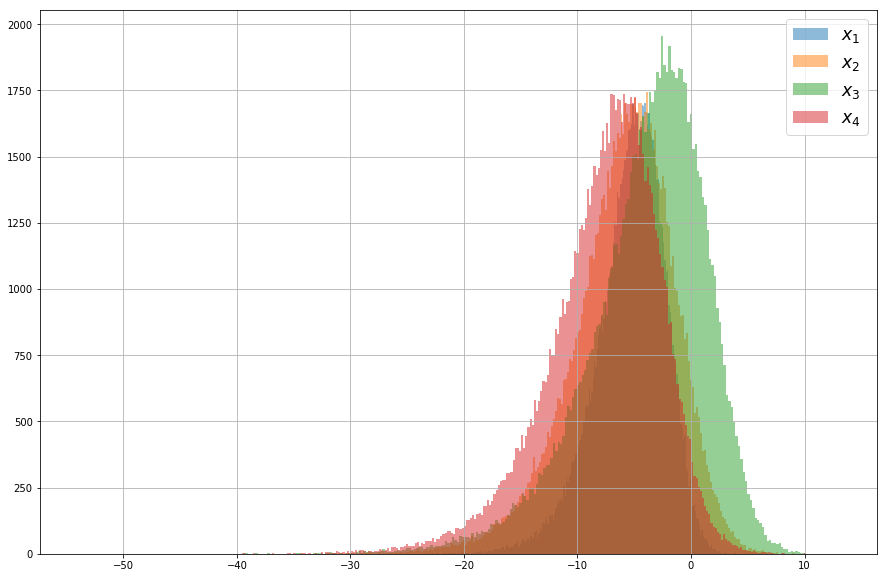

In [130]:
fig, ax = plt.subplots(1,figsize=(15,10))

plt.hist(x[0,:],bins='sqrt',alpha=.5,label=r'$x_1$')
plt.hist(x[1,:],bins='sqrt',alpha=.5,label=r'$x_2$')
plt.hist(x[2,:],bins='sqrt',alpha=.5,label=r'$x_3$')
plt.hist(x[3,:],bins='sqrt',alpha=.5,label=r'$x_4$')
#plt.hist(x[4,:],bins='sqrt',alpha=.5,label=r'$x_5$')

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [131]:
ica = FastICA(n_components=x.shape[0],algorithm='parallel',
              whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
y = y.T

number of interations: 8


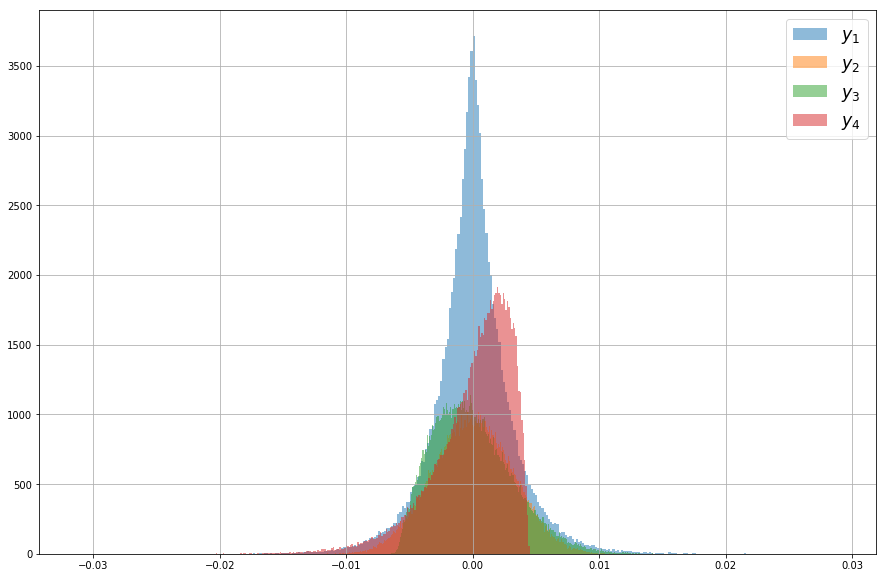

In [132]:
fig, ax = plt.subplots(1,figsize=(15,10))

plt.hist(y[0,:],bins='sqrt',alpha=.5,label=r'$y_1$')
plt.hist(y[1,:],bins='sqrt',alpha=.5,label=r'$y_2$')
plt.hist(y[2,:],bins='sqrt',alpha=.5,label=r'$y_3$')
plt.hist(y[3,:],bins='sqrt',alpha=.5,label=r'$y_4$')
#plt.hist(y[4,:],bins='sqrt',alpha=.5,label=r'$y_5$')

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


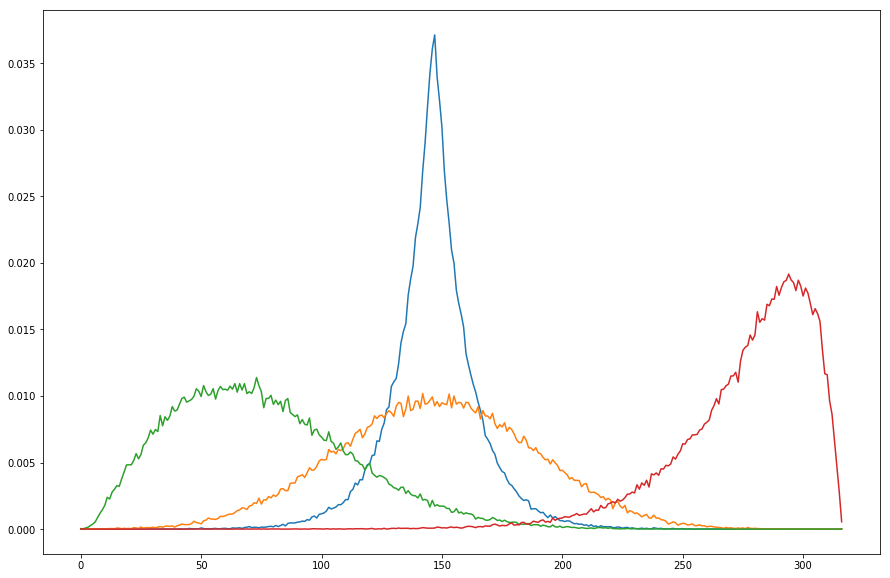

In [138]:
pdf_1 = StatisticalAnalysis.EstPDF(y[0,:],bins='sqrt',mode='hist')
pdf_2 = StatisticalAnalysis.EstPDF(y[1,:],bins='sqrt',mode='hist')
pdf_3 = StatisticalAnalysis.EstPDF(y[2,:],bins='sqrt',mode='hist')
pdf_4 = StatisticalAnalysis.EstPDF(y[3,:],bins='sqrt',mode='hist')
#pdf_5 = StatisticalAnalysis.EstPDF(y[4,:],bins='fd',mode='hist')

fig, ax = plt.subplots(1,figsize=(15,10))
plt.plot(pdf_1[0])
plt.plot(pdf_2[0])
plt.plot(pdf_3[0])
plt.plot(pdf_4[0])
#plt.plot(pdf_5[0])

plt.show()

In [139]:
StatisticalAnalysis.mutual_information((y[0,:],y[0,:]),k=5)

-4.5210248361335932

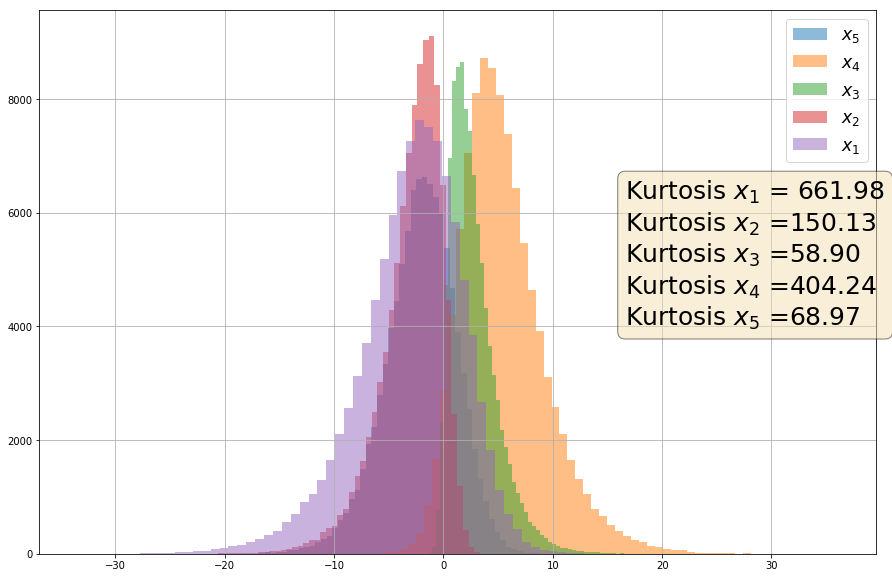

In [86]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(x[0,:],4)
k2 = stats.kstat(x[1,:],4)
k3 = stats.kstat(x[2,:],4)
k4 = stats.kstat(x[3,:],4)
k5 = stats.kstat(x[4,:],4)
textstr = 'Kurtosis $x_1$ = %.2f\nKurtosis $x_2$ =%.2f\nKurtosis $x_3$ =%.2f\nKurtosis $x_4$ =%.2f\nKurtosis $x_5$ =%.2f'%(k1,k2,k3,k4,k5)


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$x_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$x_4$')
plt.hist(x[2,:],bins=60,alpha=.5,label=r'$x_3$')
plt.hist(x[1,:],bins=60,alpha=.5,label=r'$x_2$')
plt.hist(x[0,:],bins=60,alpha=.5,label=r'$x_1$')

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [100]:
ica = FastICA(n_components=x.shape[0],algorithm='parallel',
              whiten=False,fun='cube')
y = ica.fit_transform(x.T)
y = y.T

In [83]:
y.shape

(5, 100000)

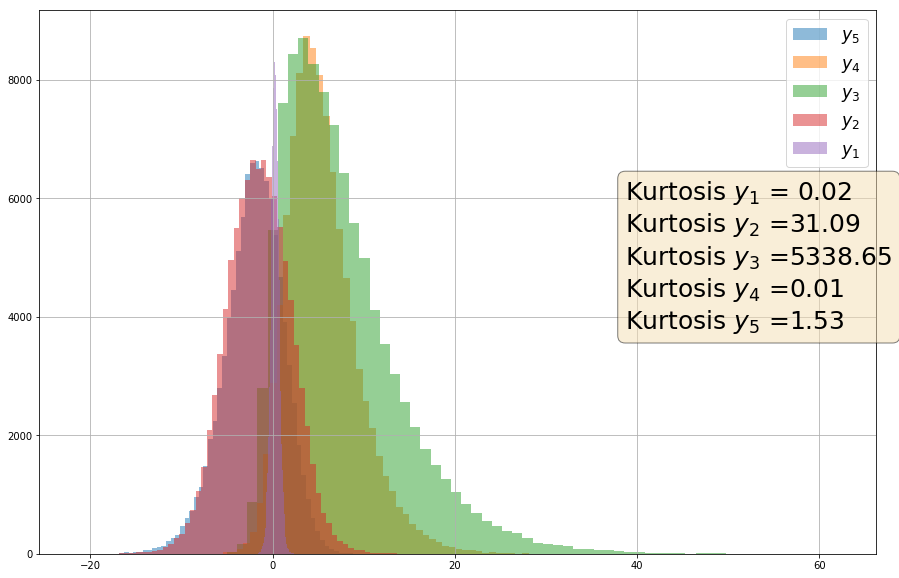

In [101]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(y[0,:],4)
k2 = stats.kstat(y[1,:],4)
k3 = stats.kstat(y[2,:],4)
k4 = stats.kstat(y[3,:],4)
k5 = stats.kstat(y[4,:],4)
textstr = 'Kurtosis $y_1$ = %.2f\nKurtosis $y_2$ =%.2f\nKurtosis $y_3$ =%.2f\nKurtosis $y_4$ =%.2f\nKurtosis $y_5$ =%.2f'%(k1,k2,k3,k4,k5)



props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$y_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$y_4$')
plt.hist(y[2,:],bins=60,alpha=.5,label=r'$y_3$')
plt.hist(y[1,:],bins=60,alpha=.5,label=r'$y_2$')
plt.hist(y[0,:],bins=60,alpha=.5,label=r'$y_1$')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [105]:
l = []
for i in range(3):
    a = i
    l.append(a)
l

[0, 1, 2]